In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [4]:
# Loading the dataset
data = pd.read_csv("language_detect.csv")

In [6]:
data.head(10)

,Text,Language
0,Nature is an inherent character or constituti...,English
1,In this general sense nature refers to the law...,English
2,"Although humans are part of nature, human acti...",English
3,[2] During the advent of modern scientific met...,English
4,"[3][4] With the Industrial revolution, nature ...",English
5,"However, a vitalist vision of nature, closer t...",English
6,"[2] Within the various uses of the word today,...",English
7,Nature can refer to the general realm of livin...,English
8,"It is often taken to mean the ""natural environ...",English
9,"For example, manufactured objects and human in...",English


In [7]:
# value count for each language
data["Language"].value_counts()

English       1484
French        1051
Spanish        861
Portugeese     786
Italian        712
Russian        690
Sweedish       685
Dutch          614
Malayalam      600
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         438
Kannada        369
Greek          367
Hindi           68
Name: Language, dtype: int64

In [8]:
X = data["Text"]
y = data["Language"]

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Text preprocessing

In [10]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

Bag of Words

In [11]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [12]:
X.shape

(10674, 40775)

Train Test split

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Model creation and Prediction

In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [15]:
# prediction
y_pred = model.predict(x_test)

Evaluating the model


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [17]:
print("Accuracy is :",ac)

Accuracy is : 0.9779859484777518


In [18]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.97      0.91      0.94        79
           2       0.99      0.98      0.99       133
           3       0.91      1.00      0.95       283
           4       0.99      1.00      0.99       242
           5       1.00      0.98      0.99        82
           6       1.00      0.99      0.99        69
           7       1.00      1.00      1.00        11
           8       0.98      0.98      0.98       129
           9       1.00      0.96      0.98        69
          10       0.99      0.99      0.99       127
          11       1.00      0.98      0.99       174
          12       0.99      0.96      0.97       144
          13       0.97      0.99      0.98       182
          14       0.97      0.94      0.96       138
          15       1.00      0.99      1.00       101
          16       1.00      0.95      0.97        78

    accuracy              

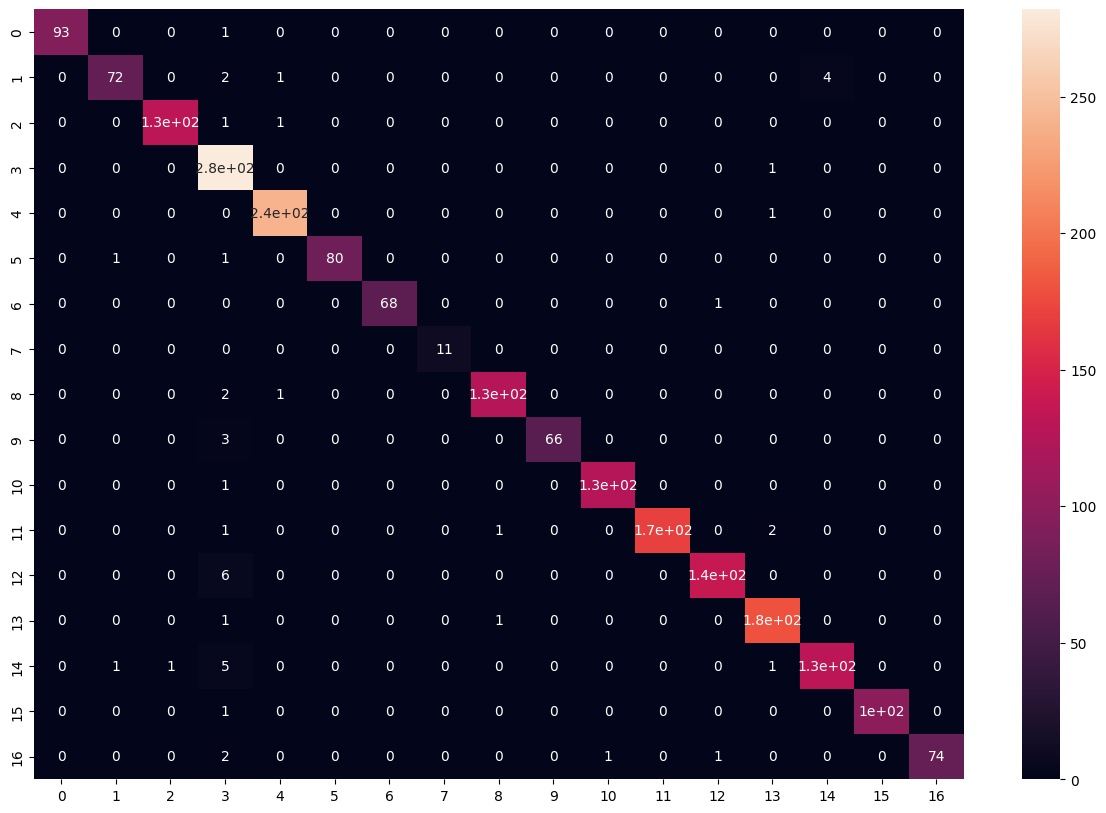

In [19]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

Model Saving

In [ ]:
# saving both cv and model
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))